In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from math import sqrt
import time
import random
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.options.mode.chained_assignment = None

%matplotlib inline

In [95]:
data=pd.read_csv('bike_train.csv')

In [96]:
data.head()

,ID,dteday,season,year,Month,is_holiday,weekdaynum,is_workingday,weathersituation,atemp_normalized,humidity_normalized,windspeed_normalized,total_rental
0,A1,01-01-2011,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,985
1,A2,02-01-2011,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,801
2,A3,03-01-2011,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,1349
3,A4,04-01-2011,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,1562
4,A5,05-01-2011,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,1600


In [97]:
data.isnull().sum()

ID                      0
dteday                  0
season                  0
year                    0
Month                   0
is_holiday              0
weekdaynum              0
is_workingday           0
weathersituation        0
atemp_normalized        0
humidity_normalized     0
windspeed_normalized    0
total_rental            0
dtype: int64

In [98]:
data.shape

(599, 13)

In [99]:
data.describe()

,season,year,Month,is_holiday,weekdaynum,is_workingday,weathersituation,atemp_normalized,humidity_normalized,windspeed_normalized,total_rental
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,2.273790,0.390651,5.682805,0.026711,2.994992,0.686144,1.385643,0.480023,0.623634,0.193228,4220.602671
std,1.032173,0.488304,3.210490,0.161373,2.004587,0.464447,0.545453,0.168173,0.146536,0.075891,1819.667084
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.079070,0.000000,0.022392,431.000000
25%,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.339310,0.507500,0.138375,2904.000000
50%,2.000000,0.000000,5.000000,0.000000,3.000000,1.000000,1.000000,0.497463,0.622174,0.184700,4294.000000
75%,3.000000,1.000000,8.000000,0.000000,5.000000,1.000000,2.000000,0.623748,0.729583,0.233214,5353.500000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.840896,0.972500,0.507463,8362.000000


In [100]:
data['season'].value_counts()

2    184
1    170
3    156
4     89
Name: season, dtype: int64

In [101]:
data['year'].value_counts()

0    365
1    234
Name: year, dtype: int64

In [102]:
data['Month'].value_counts()

1     62
3     62
5     62
7     62
4     60
6     60
2     57
8     52
10    31
12    31
9     30
11    30
Name: Month, dtype: int64

In [103]:
data['is_holiday'].value_counts()

0    583
1     16
Name: is_holiday, dtype: int64

In [104]:
data['weekdaynum'].value_counts()

6    86
0    86
1    86
2    86
3    85
4    85
5    85
Name: weekdaynum, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='count'>

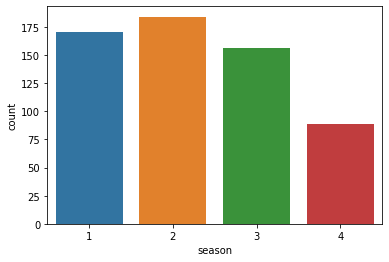

In [105]:
sns.countplot(data.season)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

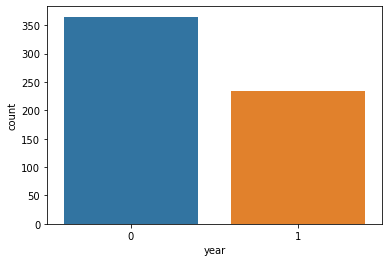

In [106]:
sns.countplot(data.year)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='count'>

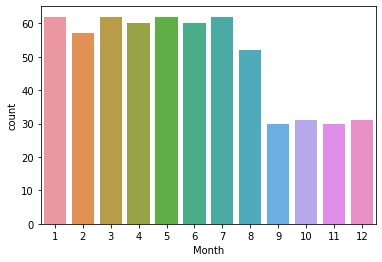

In [107]:
sns.countplot(data.Month)

<AxesSubplot:>

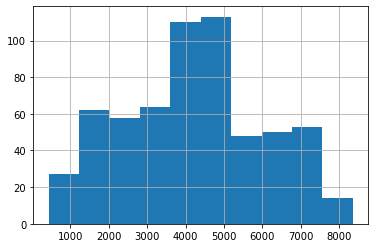

In [108]:
data['total_rental'].hist()

Text(0, 0.5, 'Working Day')

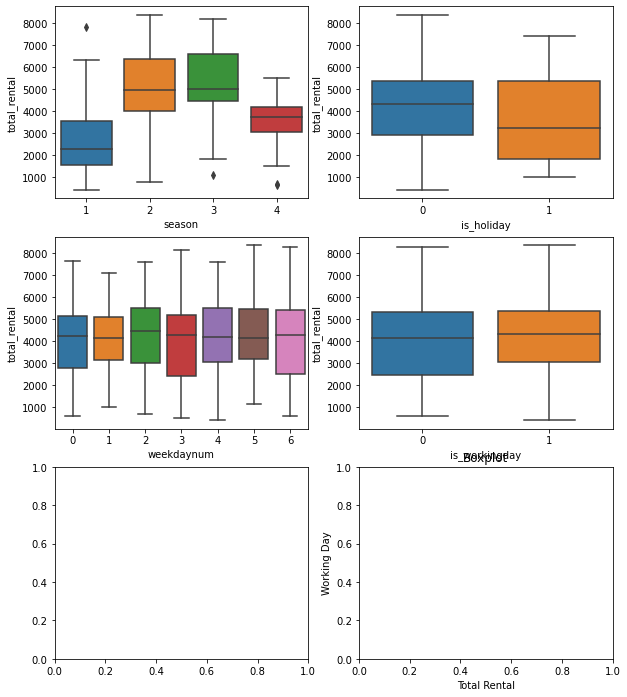

In [109]:
#Outlier analysis

fig,axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,12)
plt.title('Boxplot')
sns.boxplot(data=data,y='total_rental',x='season',ax=axes[0][0])
plt.xlabel('Total Rental')
plt.ylabel('Season')

sns.boxplot(data=data,y='total_rental',x='is_holiday',ax=axes[0][1])
plt.xlabel('Total Rental')
plt.ylabel('Holiday')

sns.boxplot(data=data,y='total_rental',x='weekdaynum',ax=axes[1][0])
plt.xlabel('Total Rental')
plt.ylabel('Weekday')

sns.boxplot(data=data,y='total_rental',x='is_workingday',ax=axes[1][1])
plt.xlabel('Total Rental')
plt.ylabel('Working Day')

<AxesSubplot:ylabel='total_rental'>

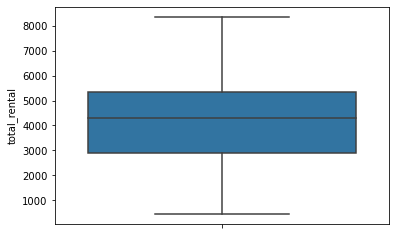

In [110]:
sns.boxplot(data=data,y='total_rental')

In [ ]:
data=data.drop(['ID','dteday'],axis=1)

In [112]:
#Correlation Analysis

data_corr=data.corr()

In [113]:
data_corr

,season,year,Month,is_holiday,weekdaynum,is_workingday,weathersituation,atemp_normalized,humidity_normalized,windspeed_normalized,total_rental
season,1.000000,-0.272285,0.863940,-0.013861,-0.000953,0.008625,0.026003,0.465360,0.226960,-0.231923,0.304522
year,-0.272285,1.000000,-0.328301,-0.005314,-0.008248,0.003262,-0.083129,0.098023,-0.170869,0.030063,0.559735
Month,0.863940,-0.328301,1.000000,0.003470,0.012745,0.002655,0.016494,0.397918,0.241805,-0.236024,0.223877
is_holiday,-0.013861,-0.005314,0.003470,1.000000,-0.097805,-0.244945,-0.041231,-0.032953,-0.044314,0.031698,-0.058734
weekdaynum,-0.000953,-0.008248,0.012745,-0.097805,1.000000,0.032435,0.047651,-0.012996,-0.036588,0.016627,0.043399
is_workingday,0.008625,0.003262,0.002655,-0.244945,0.032435,1.000000,0.062714,0.050361,0.028939,-0.003986,0.049295
weathersituation,0.026003,-0.083129,0.016494,-0.041231,0.047651,0.062714,1.000000,-0.119357,0.587124,0.026010,-0.301159
atemp_normalized,0.465360,0.098023,0.397918,-0.032953,-0.012996,0.050361,-0.119357,1.000000,0.132414,-0.189352,0.691329
humidity_normalized,0.226960,-0.170869,0.241805,-0.044314,-0.036588,0.028939,0.587124,0.132414,1.000000,-0.255905,-0.121141
windspeed_normalized,-0.231923,0.030063,-0.236024,0.031698,0.016627,-0.003986,0.026010,-0.189352,-0.255905,1.000000,-0.208880


<AxesSubplot:>

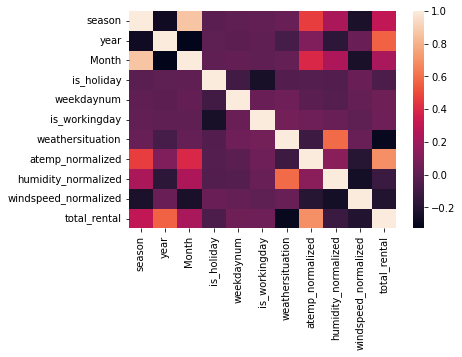

In [114]:
sns.heatmap(data_corr)

In [115]:
#Finding of correlation Analysis

# Season and year are negatively highly correlated
# season and month are positively highly correlated
# total_rental and weathersitutaion are negatively highly correlated
# total_rental and windspeed_normalized are negatively highly correlated

<AxesSubplot:xlabel='total_rental', ylabel='windspeed_normalized'>

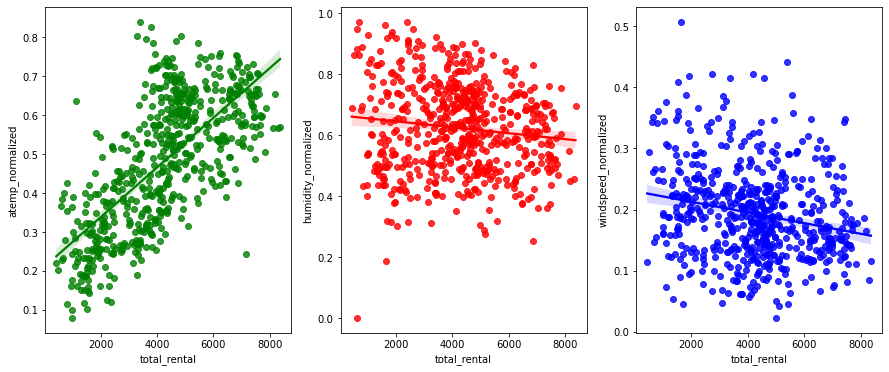

In [116]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3)
fig.set_size_inches(15,6)
sns.regplot(data=data,x='total_rental',y='atemp_normalized',ax=ax1,color='green')
sns.regplot(data=data,x='total_rental',y='humidity_normalized',ax=ax2,color='red')
sns.regplot(data=data,x='total_rental',y='windspeed_normalized',ax=ax3,color='blue')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_rental', ylabel='Density'>

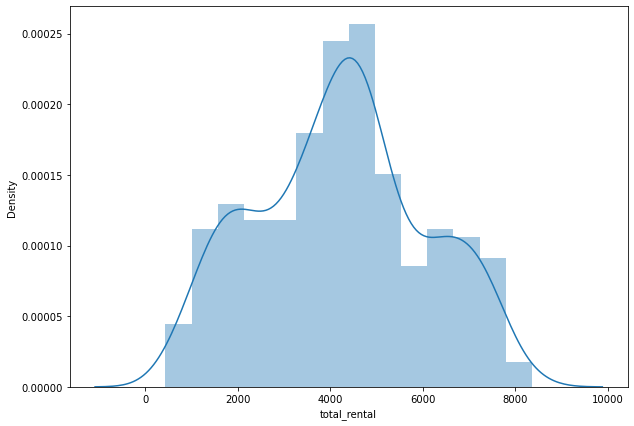

In [117]:
fig,(ax1)=plt.subplots(ncols=1)
fig.set_size_inches(10,7)
sns.distplot(data['total_rental'])

In [118]:
train_data=data.iloc[:,data.columns!='total_rental']
target_data=data['total_rental']

In [119]:
train_data.head()

,season,year,Month,is_holiday,weekdaynum,is_workingday,weathersituation,atemp_normalized,humidity_normalized,windspeed_normalized
0,1,0,1,0,6,0,2,0.363625,0.805833,0.160446
1,1,0,1,0,0,0,2,0.353739,0.696087,0.248539
2,1,0,1,0,1,1,1,0.189405,0.437273,0.248309
3,1,0,1,0,2,1,1,0.212122,0.590435,0.160296
4,1,0,1,0,3,1,1,0.229270,0.436957,0.186900


In [120]:
target_data.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: total_rental, dtype: int64

In [122]:
x_train,x_test,y_train,y_test=train_test_split(train_data,target_data,test_size=0.25,random_state=1)

In [126]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(449, 10)
(150, 10)
(449,)
(150,)


In [129]:
x=x_train
x=sm.add_constant(x)
y=np.log(y_train)
model=sm.OLS(y,x.astype(float)).fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [130]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_rental   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     125.6
Date:                Thu, 02 Jun 2022   Prob (F-statistic):          6.97e-122
Time:                        21:34:29   Log-Likelihood:                -59.223
No. Observations:                 449   AIC:                             140.4
Df Residuals:                     438   BIC:                             185.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.3783      0.094     78.096      0.000       7.193       7.564
season                   0.1439      0.027      5.334      0.000       0.091       0.197
year                     0.5113      0.030     17.043      0.000       0.452       0.570
Month                   -0.0054      0.008     -0.630      0.529      -0.022       0.011
is_holiday              -0.1634      0.082     -1.997      0.046      -0.324      -0.003
weekdaynum               0.0083      0.007      1.265      0.207      -0.005       0.021
is_workingday            0.0524      0.029      1.787      0.075      -0.005       0.110
weathersituation        -0.1966      0.031     -6.242      0.000      -0.258      -0.135
atemp_normalized         1.5995      0.096     16.668      0.000       1.411       1.788
humidity_normalized     -0.1315      0.121     -1.089      0.277      -0.369       0.106
windspeed_normalized    -0.6564      0.187     -3.516      0.000      -1.023      -0.290
==============================================================================
Omnibus:                      133.602   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              389.358
Skew:                          -1.407   Prob(JB):                     2.83e-85
Kurtosis:                       6.591   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
linear=LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [132]:
lmpredict=linear.predict(x_test)

In [134]:
lm_errors=mean_squared_error(lmpredict,y_test)

In [135]:
print("The Mean Square Error ",lm_errors)

The Mean Square Error  591076.3416701587


In [136]:
rmse=sqrt(mean_squared_error(lmpredict,y_test))

In [137]:
rmse

768.8148942822054

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'False Values')

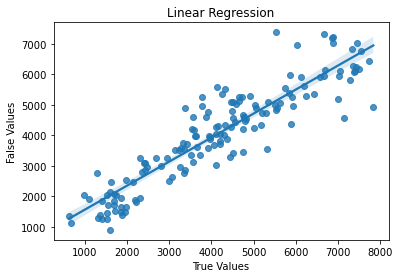

In [141]:
plt.title('Linear Regression')
sns.regplot(y_test,lmpredict)
plt.xlabel('True Values')
plt.ylabel('False Values')

In [142]:
rf=RandomForestRegressor(random_state=1234)

In [144]:
rf?

In [155]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(12)
start=time.time()

param_dist={'max_depth': [2,4,6,8,10],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2',None],
              "n_estimators" : [100 ,200 ,300 ,400 ,500]
             }

cv_randomforest = RandomizedSearchCV (rf,cv=10,param_distributions=param_dist,n_iter=10)

cv_randomforest.fit(x_train,y_train)
print('The Randomized Search',cv_randomforest.best_params_)
end=time.time()
print("The time taken in rnadomized search {0:2f}".format(end-start))

The Randomized Search {'n_estimators': 300, 'max_features': 'log2', 'max_depth': 8, 'bootstrap': False}
The time taken in rnadomized search 39.470213


In [156]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=1234)

In [157]:
rf_predict=rf.predict(x_test)

In [158]:
rf_error=mean_squared_error(rf_predict,y_test)

In [159]:
rf_error

415495.567598

In [160]:
rf_rmse=sqrt(mean_squared_error(rf_predict,y_test))

In [161]:
rf_rmse

644.5894566295667

<AxesSubplot:>

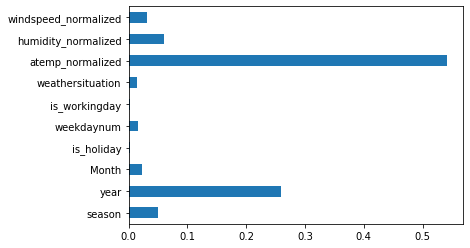

In [165]:
feature=pd.Series(rf.feature_importances_,index=x_train.columns)
feature.plot(kind='barh')

In [213]:
#model input and output
pd.DataFrame(x_test).to_csv('InputLinearRegressionRandomForestPyhon.csv', index = False)
pd.DataFrame(lmpredict,columns=['total_rental']).to_csv('outputLinearRegressionPython.csv')
pd.DataFrame(rf_predict, columns=['total_rental']).to_csv('outputRandomForestPython.csv')

In [214]:
pd.read_csv('outputRandomForestPython.csv')

,Unnamed: 0,total_rental
0,0,5364.03
1,1,4317.76
2,2,2362.66
3,3,6426.49
4,4,4246.85
...,...,...
145,145,7019.48
146,146,2826.42
147,147,3618.98
148,148,4463.29


In [210]:
pd.read_csv('outputLinearRegressionPython.csv')

,Unnamed: 0,total_rental
0,0,4386.374437
1,1,3972.220828
2,2,3244.080034
3,3,6121.011622
4,4,5509.055004
...,...,...
145,145,7335.810843
146,146,3255.237579
147,147,3529.875827
148,148,3551.113982


In [228]:
test=pd.read_csv('bike_test.csv')
test['ID']=pd.Series(test['ID'])

,ID,dteday,season,year,Month,is_holiday,weekdaynum,is_workingday,weathersituation,atemp_normalized,humidity_normalized,windspeed_normalized
126,A726,26-12-2012,1,1,12,0,3,1,3,0.220333,0.823333,0.316546
127,A727,27-12-2012,1,1,12,0,4,1,2,0.226642,0.652917,0.350133
128,A728,28-12-2012,1,1,12,0,5,1,2,0.255046,0.590000,0.155471
129,A729,29-12-2012,1,1,12,0,6,0,2,0.242400,0.752917,0.124383
130,A730,30-12-2012,1,1,12,0,0,0,1,0.231700,0.483333,0.350754
